# LangGraph and Research Agents

https://www.pinecone.io/learn/langgraph-research-agent/

In [21]:
from typing import TypedDict, Annotated
from langchain_core.agents import AgentAction
from langchain_core.messages import BaseMessage
import operator


class AgentState(TypedDict):
   input: str
   chat_history: list[BaseMessage]
   intermediate_steps: Annotated[list[tuple[AgentAction, str]], operator.add]

## ArXiv論文取得ツール

In [22]:
import requests

# we will test with the mixtral paper
arxiv_id = "2401.04088"

res = requests.get(
    f"https://export.arxiv.org/abs/{arxiv_id}"
)
print(res.text)

<?xml version="1.0" encoding="UTF-8"?>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" lang="en">
<head>
<title>[2401.04088] Mixtral of Experts</title>
<link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" />
<link rel="stylesheet" type="text/css" media="screen" href="/css/arXiv-export.css" />
<link rel="stylesheet" type="text/css" media="screen" href="/bibex/bibex.css?20181009">
<link rel="stylesheet" type="text/css" media="screen" href="https://static.arxiv.org/static/browse/0.3.8/css/browse_search.css" />
<meta name="citation_title" content="Mixtral of Experts" />
<meta name="citation_author" content="Jiang, Albert Q." />
<meta name="citation_author" content="Sablayrolles, Alexandre" />
<meta name="citation_author" content="Roux, Antoine" />
<meta name="citation_author" content="Mensch, Arthur" />
<meta name="citation_author" content="Savary, Blanche" />
<

In [23]:
import re

# our regex
abstract_pattern = re.compile(
    r'<blockquote class="abstract mathjax">\s*<span class="descriptor">Abstract:</span>\s*(.*?)\s*</blockquote>',
    re.DOTALL
)

# we search
re_match = abstract_pattern.search(res.text)

# and now let's see what we got
print(re_match.group(1))

We introduce Mixtral 8x7B, a Sparse Mixture of Experts (SMoE) language model.
Mixtral has the same architecture as Mistral 7B, with the difference that each
layer is composed of 8 feedforward blocks (i.e. experts). For every token, at
each layer, a router network selects two experts to process the current state
and combine their outputs. Even though each token only sees two experts, the
selected experts can be different at each timestep. As a result, each token has
access to 47B parameters, but only uses 13B active parameters during inference.
Mixtral was trained with a context size of 32k tokens and it outperforms or
matches Llama 2 70B and GPT-3.5 across all evaluated benchmarks. In particular,
Mixtral vastly outperforms Llama 2 70B on mathematics, code generation, and
multilingual benchmarks. We also provide a model fine-tuned to follow
instructions, Mixtral 8x7B - Instruct, that surpasses GPT-3.5 Turbo,
Claude-2.1, Gemini Pro, and Llama 2 70B - chat model on human benchmarks. Both


In [24]:
import re
from langchain_core.tools import tool

abstract_pattern = re.compile(
    r'<blockquote class="abstract mathjax">\s*<span class="descriptor">Abstract:</span>\s*(.*?)\s*</blockquote>',
    re.DOTALL
)

@tool("fetch_arxiv")
def fetch_arxiv(arxiv_id: str):
   """Gets the abstract from an ArXiv paper given the arxiv ID. Useful for
   finding high-level context about a specific paper."""
   # get paper page in html
   res = requests.get(
       f"https://export.arxiv.org/abs/{arxiv_id}"
   )
   # search html for abstract
   re_match = abstract_pattern.search(res.text)
   # return abstract text
   return re_match.group(1)

In [6]:
print(fetch_arxiv.invoke({"arxiv_id": "2401.04088"}))

We introduce Mixtral 8x7B, a Sparse Mixture of Experts (SMoE) language model.
Mixtral has the same architecture as Mistral 7B, with the difference that each
layer is composed of 8 feedforward blocks (i.e. experts). For every token, at
each layer, a router network selects two experts to process the current state
and combine their outputs. Even though each token only sees two experts, the
selected experts can be different at each timestep. As a result, each token has
access to 47B parameters, but only uses 13B active parameters during inference.
Mixtral was trained with a context size of 32k tokens and it outperforms or
matches Llama 2 70B and GPT-3.5 across all evaluated benchmarks. In particular,
Mixtral vastly outperforms Llama 2 70B on mathematics, code generation, and
multilingual benchmarks. We also provide a model fine-tuned to follow
instructions, Mixtral 8x7B - Instruct, that surpasses GPT-3.5 Turbo,
Claude-2.1, Gemini Pro, and Llama 2 70B - chat model on human benchmarks. Both


In [7]:
print(fetch_arxiv.invoke({"arxiv_id": "2309.17421"}))

Large multimodal models (LMMs) extend large language models (LLMs) with
multi-sensory skills, such as visual understanding, to achieve stronger generic
intelligence. In this paper, we analyze the latest model, GPT-4V(ision), to
deepen the understanding of LMMs. The analysis focuses on the intriguing tasks
that GPT-4V can perform, containing test samples to probe the quality and
genericity of GPT-4V's capabilities, its supported inputs and working modes,
and the effective ways to prompt the model. In our approach to exploring
GPT-4V, we curate and organize a collection of carefully designed qualitative
samples spanning a variety of domains and tasks. Observations from these
samples demonstrate that GPT-4V's unprecedented ability in processing
arbitrarily interleaved multimodal inputs and the genericity of its
capabilities together make GPT-4V a powerful multimodal generalist system.
Furthermore, GPT-4V's unique capability of understanding visual markers drawn
on input images can give ri

## Web検索ツール

In [25]:
import os
from serpapi import GoogleSearch
from getpass import getpass

serpapi_params = {
    "engine": "google",
    "api_key": os.getenv("SERP_API_KEY")
}

search = GoogleSearch({
    **serpapi_params,
    "q": "AIエージェント"
})

results = search.get_dict()["organic_results"]
results

[{'position': 1,
  'title': 'AI エージェントとは何ですか? - 人工知能のエージェントの説明',
  'link': 'https://aws.amazon.com/jp/what-is/ai-agents/',
  'redirect_link': 'https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://aws.amazon.com/jp/what-is/ai-agents/&ved=2ahUKEwiP2rLakNiJAxUo78kDHZ2eIIYQFnoECCIQAQ',
  'displayed_link': 'https://aws.amazon.com › ... › AI',
  'favicon': 'https://serpapi.com/searches/6733fd40360f4e85ecc5a176/images/452eaf1f7a1be6b40556c8a3e96ea2bf6e8b38dccce155bdf8c11910bd26558e.webp',
  'snippet': 'AI エージェントは、人間の介入なしに特定のタスクを実行する自律型インテリジェントシステムです。組織は AI エージェントを使用して特定の目標を達成し、より効率的な ...',
  'snippet_highlighted_words': ['AI エージェント', 'AI エージェント'],
  'sitelinks': {'inline': [{'title': 'AI エージェントの使用にはどのよ...',
     'link': 'https://aws.amazon.com/jp/what-is/ai-agents/#seo-faq-pairs#what-are-the-benefits-of-using-ai-agents'},
    {'title': 'AI エージェントの仕組みを教えて...',
     'link': 'https://aws.amazon.com/jp/what-is/ai-agents/#seo-faq-pairs#how-does-an-ai-agent-work'}]},
  'source'

In [9]:
contexts = "\n---\n".join(
    ["\n".join([x["title"], x["snippet"], x["link"]]) for x in results]
)
print(contexts)

AI エージェントとは何ですか? - 人工知能のエージェントの説明
AI エージェントは、人間の介入なしに特定のタスクを実行する自律型インテリジェントシステムです。組織は AI エージェントを使用して特定の目標を達成し、より効率的な ...
https://aws.amazon.com/jp/what-is/ai-agents/
---
AIエージェントで「業務プロセス」自動化、Salesforceや ...
独SAPや米Oracle（オラクル）も2024年9月から10月にかけて、ERP（統合基幹業務システム）などのSaaSに、AIエージェント機能を順次組み込んで提供すると表明。
https://xtech.nikkei.com/atcl/nxt/column/18/00001/09954/
---
AIエージェントとは？自律型で生成AIとは何が違う？特徴 ...
AIエージェントとは、複数のAIモデルやデバイスを組み合わせることで、単一のモデルでは困難だった高度で複雑なタスクを自律的に実行できるシステムのことを指します。企業 ...
https://ai-market.jp/technology/ai-agent/
---
AIエージェントとは何か？
AIエージェントは、ユーザーの代わりにタスクを実行するソフトウェアである。プロセスを自動化し、意思決定を行い、インテリジェントに環境と相互作用 ...
https://botpress.com/ja/blog/what-is-an-ai-agent
---
AIエージェント： AIを駆使したインテリジェントなサポートに ...
AIエージェントとは、AIを搭載したボットであり、単純な問い合わせから複雑な問題まで、さまざまな顧客からのリクエストに自律的に対応し、解決できます。
https://www.zendesk.co.jp/blog/ai-agents/
---
AIエージェントとは
AIエージェントは、人的資源を必要とする複雑なタスクを自動化できるAIツールです。目標を安価に、迅速に、大規模に達成できます。これらの進歩により、人間のエージェント ...
https://www.ibm.com/jp-ja/think/topics/ai-agents
---
AI エージェント
AI エージェントでビジネス全体のワ

In [26]:
@tool("web_search")
def web_search(query: str):
   """Finds general knowledge information using Google search. Can also be used
   to augment more 'general' knowledge to a previous specialist query."""
   search = GoogleSearch({
       **serpapi_params,
       "q": query,
       "num": 5
   })
   results = search.get_dict()["organic_results"]
   contexts = "\n---\n".join(
       ["\n".join([x["title"], x["snippet"], x["link"]]) for x in results]
   )
   return contexts

In [11]:
print(web_search.invoke({"query": "機械学習とは？"}))

機械学習 | 用語解説 | 野村総合研究所(NRI)
機械学習とは、データを分析する方法の1つで、データから、「機械」（コンピューター）が自動で「学習」し、データの背景にあるルールやパターンを発見する方法。
https://www.nri.com/jp/knowledge/glossary/lst/ka/machine_learning
---
機械学習とは？機械学習の仕組みとディープラーニングとの ...
機械学習では、コンピューターに膨大な量のデータを読み込ませ、様々なアルゴリズムに基づいて分析をさせる仕組みです。 コンピューターに ...
https://www.nttdata-gsl.co.jp/related/column/what-is-machine-learning.html
---
機械学習
機械学習（きかいがくしゅう、英: machine learning）とは、経験からの学習により自動で改善するコンピューターアルゴリズムもしくはその研究領域で、人工知能の一種で ...
https://ja.wikipedia.org/wiki/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92
---
機械学習とは？仕組み、手法、学び方から利用例まで
機械学習は、人間や動物が経験を通して自然に学習することをコンピューターにさせようとするデータ解析テクニックです。機械学習アルゴリズムは所定の方程式をモデルとして ...
https://jp.mathworks.com/discovery/machine-learning.html
---
機械学習とは？なぜ注目されるのか、手法・活用事例 ... - NEC
機械学習とは、コンピュータ（機械）が多様なデータから対応パターンとルールを自動で学習する技術です。 これらのパターンやルールをもとに、データの分類や予測などを実 ...
https://jpn.nec.com/solution/dotdata/tips/machine-learning/index.html


## RAGツール

### データセットの準備

In [1]:
from datasets import load_dataset

dataset = load_dataset("jamescalam/ai-arxiv2-semantic-chunks", split="train")
dataset

Dataset({
    features: ['id', 'title', 'content', 'prechunk_id', 'postchunk_id', 'arxiv_id', 'references'],
    num_rows: 209760
})

In [2]:
dataset[0]

{'id': '2401.04088#0',
 'title': 'Mixtral of Experts',
 'content': '4 2 0 2 n a J 8 ] G L . s c [ 1 v 8 8 0 4 0 . 1 0 4 2 : v i X r a # Mixtral of Experts Albert Q. Jiang, Alexandre Sablayrolles, Antoine Roux, Arthur Mensch, Blanche Savary, Chris Bamford, Devendra Singh Chaplot, Diego de las Casas, Emma Bou Hanna, Florian Bressand, Gianna Lengyel, Guillaume Bour, Guillaume Lample, LÃ©lio Renard Lavaud, Lucile Saulnier, Marie-Anne Lachaux, Pierre Stock, Sandeep Subramanian, Sophia Yang, Szymon Antoniak, Teven Le Scao, ThÃ©ophile Gervet, Thibaut Lavril, Thomas Wang, TimothÃ©e Lacroix, William El Sayed Abstract We introduce Mixtral 8x7B, a Sparse Mixture of Experts (SMoE) language model. Mixtral has the same architecture as Mistral 7B, with the difference that each layer is composed of 8 feedforward blocks (i.e. experts). For every token, at each layer, a router network selects two experts to process the current state and combine their outputs. Even though each token only sees two experts

In [3]:
from semantic_router.encoders import OpenAIEncoder

encoder = OpenAIEncoder(name="text-embedding-3-small")

In [4]:
# TEST
embeddings = encoder(["テストだよ"])
print(len(embeddings))
print(len(embeddings[0]))

1
1536


In [ ]:
import os
from pinecone import Pinecone

api_key = os.getenv("PINECONE_API_KEY")

# PineconeはプロジェクトごとにAPIキーがあるので事前にプロジェクトを作成しておく
pc = Pinecone(api_key=api_key)

In [9]:
from pinecone import ServerlessSpec

spec = ServerlessSpec(
    cloud="aws",
    region="us-east-1",
)

In [10]:
# 新しいインデックスを作成
import time

index_name = "gpt-4o-research-agent"

# check if index already exists (it shouldn't if this is first time)
if index_name not in pc.list_indexes().names():
    # if does not exist, create index
    pc.create_index(
        index_name,
        dimension=1536,  # dimensionality of embed 3
        metric='dotproduct',
        spec=spec
    )
    # wait for index to be initialized
    while not pc.describe_index(index_name).status['ready']:
        time.sleep(1)

# connect to index
index = pc.Index(index_name)
time.sleep(1)
# view index stats
index.describe_index_stats()

{'dimension': 1536,
 'index_fullness': 0.0,
 'namespaces': {},
 'total_vector_count': 0}

In [11]:
# インデックスを作成
from tqdm.auto import tqdm

# easier to work with dataset as pandas dataframe
data = dataset.to_pandas().iloc[:10000]
len(data)

10000

In [12]:
batch_size = 128

for i in tqdm(range(0, len(data), batch_size)):
    i_end = min(len(data), i+batch_size)
    batch = data[i:i_end].to_dict(orient="records")
    # get batch of data
    metadata = [{
        "title": r["title"],
        "content": r["content"],
        "arxiv_id": r["arxiv_id"],
        "references": r["references"].tolist()
    } for r in batch]
    # generate unique ids for each chunk
    ids = [r["id"] for r in batch]
    # get text content to embed
    content = [r["content"] for r in batch]
    # embed text
    embeds = encoder(content)
    # add to Pinecone
    index.upsert(vectors=zip(ids, embeds, metadata))

  0%|          | 0/79 [00:00<?, ?it/s]

## RAGツール

In [13]:
from langchain_core.tools import tool

def format_rag_contexts(matches: list):
    contexts = []
    for x in matches:
        text = (
            f"Title: {x['metadata']['title']}\n"
            f"Content: {x['metadata']['content']}\n"
            f"ArXiv ID: {x['metadata']['arxiv_id']}\n"
            f"Related Papers: {x['metadata']['references']}\n"
        )
        contexts.append(text)
    context_str = "\n---\n".join(contexts)
    return context_str

@tool("rag_search_filter")
def rag_search_filter(query: str, arxiv_id: str):
    """Finds information from our ArXiv database using a natural language query
    and a specific ArXiv ID. Allows us to learn more details about a specific paper."""
    xq = encoder([query])
    xc = index.query(vector=xq, top_k=6, include_metadata=True, filter={"arxiv_id": arxiv_id})
    context_str = format_rag_contexts(xc["matches"])
    return context_str

@tool("rag_search")
def rag_search(query: str):
    """Finds specialist information on AI using a natural language query."""
    xq = encoder([query])
    xc = index.query(vector=xq, top_k=2, include_metadata=True)
    context_str = format_rag_contexts(xc["matches"])
    return context_str

In [15]:
print(rag_search.invoke({"query": "AutoGenとは？"}))

Title: AutoGen: Enabling Next-Gen LLM Applications via Multi-Agent Conversation
Content: 4 AutoGen features the following design patterns to facilitate conversation programming: 1. Unified interfaces and auto-reply mechanisms for automated agent chat. Agents in AutoGen have unified conversation interfaces for performing the corresponding conversation- centric computation, including a send/receive function for sending/receiving messages and a generate reply function for taking actions and generating a response based on the received message. AutoGen also introduces and by default adopts an agent auto-reply mechanism to realize conversation-driven control: Once an agent receives a message from another agent, it au- tomatically invokes generate reply and sends the reply back to the sender unless a termination condition is satisfied. AutoGen provides built-in reply functions based on LLM inference, code or function execution, or human input. One can also register custom reply functions to c

In [16]:
print(rag_search_filter.invoke({"query": "AutoGenとは？", "arxiv_id": "2308.08155"}))

Title: AutoGen: Enabling Next-Gen LLM Applications via Multi-Agent Conversation
Content: 4 AutoGen features the following design patterns to facilitate conversation programming: 1. Unified interfaces and auto-reply mechanisms for automated agent chat. Agents in AutoGen have unified conversation interfaces for performing the corresponding conversation- centric computation, including a send/receive function for sending/receiving messages and a generate reply function for taking actions and generating a response based on the received message. AutoGen also introduces and by default adopts an agent auto-reply mechanism to realize conversation-driven control: Once an agent receives a message from another agent, it au- tomatically invokes generate reply and sends the reply back to the sender unless a termination condition is satisfied. AutoGen provides built-in reply functions based on LLM inference, code or function execution, or human input. One can also register custom reply functions to c

## Final Answerツール

In [47]:
@tool("final_answer")
def final_answer(
   introduction: str,
   research_steps: str,
   main_body: str,
   conclusion: str,
   sources: str
):
   """ ユーザーへの自然言語の回答として、研究報告書の形式で返します。
   この報告書にはいくつかのセクションがあります。
   
   それらは以下の通りです：
    - introduction（はじめに）：ユーザーの質問と研究しているトピックを紹介する短い段落です。
    - research_steps（研究のステップ）：報告書を作成するために取られたステップをいくつかの箇条書きで説明します。
    - main_body（本体）：ユーザーの質問に対する高品質で簡潔な情報の大部分がここに含まれます。3～4段落の長さです。
    - conclusion（結論）：発見された内容に関する簡潔で洗練された見解を提供する短い1段落の結論です。
    - sources（参照元）：研究過程で参照したすべての情報に関する詳細な情報源を箇条書きで提供します。 
    
    内容は日本語に翻訳して出力してください。"""
   if type(research_steps) is list:
       research_steps = "\n".join([f"- {r}" for r in research_steps])
   if type(sources) is list:
       sources = "\n".join([f"- {s}" for s in sources])
   return ""

## 意思決定者を定義する

In [19]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder


system_prompt = """あなたはオラクル、偉大なAIの意思決定者です。
ユーザーのクエリに対して、提供されたツールのリストに基づいて何をするかを決定しなければなりません。


もし特定のクエリでツールが（スクラッチパッドで）使用されているのを見た場合、
そのクエリに対して同じツールを再度使用しないでください。
また、どのツールも2回以上使用しないでください（つまり、ツールがスクラッチパッドに2回現れた場合、
それを再度使用しないでください）。


ユーザーに答えを提供する前に、さまざまなソースから情報を集めることを目指してください。
ユーザーの質問に答えるための十分な情報（スクラッチパッドに保存されたもの）を集めたら、
final_answerツールを使用してください。"""



prompt = ChatPromptTemplate.from_messages([
   ("system", system_prompt),
   MessagesPlaceholder(variable_name="chat_history"),
   ("user", "{input}"),
   ("assistant", "scratchpad: {scratchpad}"),
])

In [48]:
from langchain_core.messages import ToolCall, ToolMessage
from langchain_openai import ChatOpenAI


llm = ChatOpenAI(
   model="gpt-4o",
   openai_api_key=os.environ["OPENAI_API_KEY"],
   temperature=0
)


tools=[
   rag_search_filter,
   rag_search,
   fetch_arxiv,
   web_search,
   final_answer
]


# define a function to transform intermediate_steps from list
# of AgentAction to scratchpad string
def create_scratchpad(intermediate_steps: list[AgentAction]):
   research_steps = []
   for i, action in enumerate(intermediate_steps):
       if action.log != "TBD":
           # this was the ToolExecution
           research_steps.append(
               f"Tool: {action.tool}, input: {action.tool_input}\n"
               f"Output: {action.log}"
           )
   return "\n---\n".join(research_steps)


oracle = (
   {
       "input": lambda x: x["input"],
       "chat_history": lambda x: x["chat_history"],
       "scratchpad": lambda x: create_scratchpad(
           intermediate_steps=x["intermediate_steps"]
       ),
   }
   | prompt
   | llm.bind_tools(tools, tool_choice="any")
)

In [49]:
inputs = {
    "input": "犬についての面白い事実を教えて",
    "chat_history": [],
    "intermediate_steps": []
}

out = oracle.invoke(inputs)
print(out)

content='' additional_kwargs={'tool_calls': [{'id': 'call_YfgQ3n19XEqafCpKmr56bGc8', 'function': {'arguments': '{"query":"犬についての面白い事実"}', 'name': 'web_search'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 696, 'total_tokens': 717, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_159d8341cc', 'finish_reason': 'tool_calls', 'logprobs': None} id='run-489dc1bb-85b5-405e-a55f-88dfb8211bd4-0' tool_calls=[{'name': 'web_search', 'args': {'query': '犬についての面白い事実'}, 'id': 'call_YfgQ3n19XEqafCpKmr56bGc8', 'type': 'tool_call'}] usage_metadata={'input_tokens': 696, 'output_tokens': 21, 'total_tokens': 717, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [50]:
out.tool_calls

[{'name': 'web_search',
  'args': {'query': '犬についての面白い事実'},
  'id': 'call_YfgQ3n19XEqafCpKmr56bGc8',
  'type': 'tool_call'}]

## グラフコンポーネントを作成

In [51]:
from typing import TypedDict


def run_oracle(state: TypedDict):
   print("run_oracle")
   print(f"intermediate_steps: {state['intermediate_steps']}")
   out = oracle.invoke(state)
   tool_name = out.tool_calls[0]["name"]
   tool_args = out.tool_calls[0]["args"]
   action_out = AgentAction(
       tool=tool_name,
       tool_input=tool_args,
       log="TBD"
   )
   return {
       "intermediate_steps": [action_out]
   }


def router(state: TypedDict):
   # return the tool name to use
   if isinstance(state["intermediate_steps"], list):
       return state["intermediate_steps"][-1].tool
   else:
       # if we output bad format go to final answer
       print("Router invalid format")
       return "final_answer"

In [52]:
tool_str_to_func = {
   "rag_search_filter": rag_search_filter,
   "rag_search": rag_search,
   "fetch_arxiv": fetch_arxiv,
   "web_search": web_search,
   "final_answer": final_answer
}


def run_tool(state: TypedDict):
   # use this as helper function so we repeat less code
   tool_name = state["intermediate_steps"][-1].tool
   tool_args = state["intermediate_steps"][-1].tool_input
   print(f"{tool_name}.invoke(input={tool_args})")
   # run tool
   out = tool_str_to_func[tool_name].invoke(input=tool_args)
   action_out = AgentAction(
       tool=tool_name,
       tool_input=tool_args,
       log=str(out)
   )
   return {"intermediate_steps": [action_out]}

In [53]:
from langgraph.graph import StateGraph, END

# initialize the graph with our AgentState
graph = StateGraph(AgentState)

# add nodes
graph.add_node("oracle", run_oracle)
graph.add_node("rag_search_filter", run_tool)
graph.add_node("rag_search", run_tool)
graph.add_node("fetch_arxiv", run_tool)
graph.add_node("web_search", run_tool)
graph.add_node("final_answer", run_tool)

# specify the entry node
graph.set_entry_point("oracle")

# add the conditional edges which use the router
graph.add_conditional_edges(
   source="oracle",  # where in graph to start
   path=router,  # function to determine which node is called
)

# create edges from each tool back to the oracle
for tool_obj in tools:
   if tool_obj.name != "final_answer":
       graph.add_edge(tool_obj.name, "oracle")

# if anything goes to final answer, it must then move to END
graph.add_edge("final_answer", END)

# finally, we compile our graph
runnable = graph.compile()

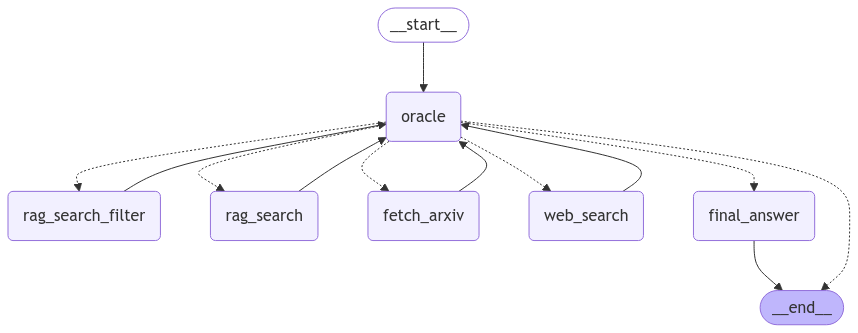

In [54]:
from IPython.display import display, Image

display(Image(runnable.get_graph().draw_mermaid_png()))

## レポートを作成

In [55]:
out = runnable.invoke({
    "input": "犬についての面白い事実を教えて",
    "chat_history": [],
})

run_oracle
intermediate_steps: []
web_search.invoke(input={'query': '犬 面白い事実'})
run_oracle
intermediate_steps: [AgentAction(tool='web_search', tool_input={'query': '犬 面白い事実'}, log='TBD'), AgentAction(tool='web_search', tool_input={'query': '犬 面白い事実'}, log='犬に関する面白い10の事実: 私たちの毛むくじゃらの友達を ...\n犬に関する面白い事実トップ10 · 1. 犬は驚異的な嗅覚を持っている · 2. サルーキは最古の犬種です · 3. 最も長生きした犬は31歳まで生きました · 4. 犬は地球の磁場を使っ ...\nhttps://www.petradar.org/ja/articles/10-fun-dog-facts-understanding-our-furry-friends\n---\n犬の雑学！知らなかったうんちく10連発\n1. 犬の血液型は全部で8種類 · 2. 犬があくびをする理由は「眠い」以外にもある · 3. 犬に鼻くそはできない · 4. 犬の鼻には温度を感知する機能がある.\nhttps://wanchan.jp/living/detail/2010\n---\n思わずクスッ！これって愛犬だけ！？わんちゃんの面白行動 ...\n1 わんちゃんは感情表現が豊かな生きもの · 2 わんちゃんの面白行動に迫る！ · 3 【画像あり】面白い表情や情けない表情のわんちゃんを一挙ご紹介！ · 4 わん ...\nhttps://inunavi.plan-b.co.jp/funny_episode/\n---\n犬好きなら知っておこう！犬に関する雑学や豆知識\n犬の嗅覚は、一般的に人間の6～10倍程度だと考えられています。 しかし、においの種類によっては約1億倍ともいわれていることをご存じでしょうか。 人間の ...\nhttps://pet-info.event.rakuten.net/articles/15302129540\n---\n身近な存在、でも知らないことがたくさん！犬のおもしろ雑学

In [56]:
out

{'input': '犬についての面白い事実を教えて',
 'chat_history': [],
 'intermediate_steps': [AgentAction(tool='web_search', tool_input={'query': '犬 面白い事実'}, log='TBD'),
  AgentAction(tool='web_search', tool_input={'query': '犬 面白い事実'}, log='犬に関する面白い10の事実: 私たちの毛むくじゃらの友達を ...\n犬に関する面白い事実トップ10 · 1. 犬は驚異的な嗅覚を持っている · 2. サルーキは最古の犬種です · 3. 最も長生きした犬は31歳まで生きました · 4. 犬は地球の磁場を使っ ...\nhttps://www.petradar.org/ja/articles/10-fun-dog-facts-understanding-our-furry-friends\n---\n犬の雑学！知らなかったうんちく10連発\n1. 犬の血液型は全部で8種類 · 2. 犬があくびをする理由は「眠い」以外にもある · 3. 犬に鼻くそはできない · 4. 犬の鼻には温度を感知する機能がある.\nhttps://wanchan.jp/living/detail/2010\n---\n思わずクスッ！これって愛犬だけ！？わんちゃんの面白行動 ...\n1 わんちゃんは感情表現が豊かな生きもの · 2 わんちゃんの面白行動に迫る！ · 3 【画像あり】面白い表情や情けない表情のわんちゃんを一挙ご紹介！ · 4 わん ...\nhttps://inunavi.plan-b.co.jp/funny_episode/\n---\n犬好きなら知っておこう！犬に関する雑学や豆知識\n犬の嗅覚は、一般的に人間の6～10倍程度だと考えられています。 しかし、においの種類によっては約1億倍ともいわれていることをご存じでしょうか。 人間の ...\nhttps://pet-info.event.rakuten.net/articles/15302129540\n---\n身近な存在、でも知らないことがたくさん！犬のおもしろ雑学まとめ\n犬の血液型は全部で8種類！ 犬がうんちをするときにクルクル回る

In [57]:
def build_report(output: dict):
    research_steps = output["research_steps"]
    if type(research_steps) is list:
        research_steps = "\n".join([f"- {r}" for r in research_steps])
    sources = output["sources"]
    if type(sources) is list:
        sources = "\n".join([f"- {s}" for s in sources])
    return f"""
INTRODUCTION
------------
{output["introduction"]}

RESEARCH STEPS
--------------
{research_steps}

REPORT
------
{output["main_body"]}

CONCLUSION
----------
{output["conclusion"]}

SOURCES
-------
{sources}
"""

In [58]:
print(build_report(
    output=out["intermediate_steps"][-1].tool_input
))


INTRODUCTION
------------
犬は人間の最良の友とされ、多くの家庭で愛されているペットです。彼らについての面白い事実を探求することで、犬のユニークな特性や行動についてより深く理解することができます。

RESEARCH STEPS
--------------
- ウェブ検索を使用して、犬に関する面白い事実を調査しました。

REPORT
------
犬は驚異的な嗅覚を持っており、特定のにおいを人間の1億倍も敏感に感じ取ることができます。これは、彼らが捜索救助や麻薬探知などの分野で活躍する理由の一つです。また、サルーキという犬種は最古の犬種とされ、古代エジプト時代から存在していたと考えられています。さらに、犬の血液型は8種類あり、人間よりも多様です。犬がうんちをする際にクルクル回るのは、地球の磁場を感じ取っているためとも言われています。

CONCLUSION
----------
犬はその驚異的な嗅覚や古代からの歴史、ユニークな行動など、多くの面白い特性を持っています。これらの事実は、犬が単なるペット以上の存在であり、私たちの生活に深く関わっていることを示しています。

SOURCES
-------
- https://www.petradar.org/ja/articles/10-fun-dog-facts-understanding-our-furry-friends
- https://wanchan.jp/living/detail/2010
- https://pet-info.event.rakuten.net/articles/15302129540



In [59]:
out = runnable.invoke({
    "input": "人工知能について教えて",
    "chat_history": [],
})

print(build_report(
    output=out["intermediate_steps"][-1].tool_input
))

run_oracle
intermediate_steps: []
rag_search.invoke(input={'query': '人工知能の概要'})
run_oracle
intermediate_steps: [AgentAction(tool='rag_search', tool_input={'query': '人工知能の概要'}, log='TBD'), AgentAction(tool='rag_search', tool_input={'query': '人工知能の概要'}, log="Title: Cognitive Architectures for Language Agents\nContent: Computational rationality: A converging paradigm for intelligence in brains, minds, and machines. Science, 349(6245):273â 278, 2015. T. L. Griffiths. Understanding human intelligence through human limitations. Trends in Cognitive Sciences, 24(11):873â 883, 2020. J. Gu, Y. Wang, K. Cho, and V. O. Li. Search engine guided neural machine translation. In Proceedings of the AAAI Conference on Artificial Intelligence, volume 32, 2018. L. Guan, K. Valmeekam, S. Sreedharan, and S. Kambhampati.\nArXiv ID: 2309.02427\nRelated Papers: ['2305.14909']\n\n---\nTitle: The Good, The Bad, and Why: Unveiling Emotions in Generative AI\nContent: 43, 2006. [6] Suzanne G Benson and Stephen P Dun

In [60]:
out = runnable.invoke({
    "input": "AutoGenとはどのような技術ですか？",
    "chat_history": [],
})

print(build_report(
    output=out["intermediate_steps"][-1].tool_input
))

run_oracle
intermediate_steps: []
rag_search.invoke(input={'query': 'AutoGen technology'})
run_oracle
intermediate_steps: [AgentAction(tool='rag_search', tool_input={'query': 'AutoGen technology'}, log='TBD'), AgentAction(tool='rag_search', tool_input={'query': 'AutoGen technology'}, log="Title: AutoGen: Enabling Next-Gen LLM Applications via Multi-Agent Conversation\nContent: â ¢ Ease of use: The built-in agents can be used out-of-the-box, delivering strong performance even without any customization. (A1, A3) â ¢ Modularity: The division of tasks into separate agents promotes modularity in the system. Each agent can be developed, tested, and maintained independently, simplifying the overall develop- ment process and facilitating code management. (A3, A4, A5, and A6) â ¢ Programmability: AutoGen allows users to extend/customize existing agents to develop systems satisfying their specific needs with ease. (A1-A6). For example, with AutoGen, the core workflow code in A4 is reduced from o